Hello!
In the cell below I have written a random walk code:
The code models how an object (e.g. ball, atom) gets propagated from node to node (e.g. person, surface site etc.) in a random manner. The model has 4 possible directions (with equal probability) from each node for simplicity.
The code is by no means "clean" and doesn't use shortcuts that could be used to shorten the code.

In [ ]:
import random
#The function below returns the x, y coordinates after a "n" step long random walk
def randomwalk(n):
    x = 0
    y = 0
    for i in range(n):
        step = random.choice(['up','down','left','right'])
        if step == 'up':
            y = y + 1
        elif step == 'down':
            y = y - 1
        elif step == 'left':
            x = x - 1
        elif step == 'right':
            x = x + 1
    return(x,y)
#Here I randomly decide to do randomly 100 moves and see where I end up
walk = randomwalk(100)
print(walk)
print() # empty line for clarity
#Here I do 10 times a 100 step random walk
for i in range(10):
    walk = randomwalk(100)
    print(walk)


I suppose one could then do thousands of these random walks to see how far an object finds itself from the initial node on average after n steps.Now, we can change the previous code slightly to turn it into a kMC model.


In [ ]:
import math
def randomwalk():
    t=0
    x = 0
    y = 0
    while t<2:
        step = random.choice(['up','down','left','right'])
        #Here I invert the [0,1) interval of the random.random() to (0,1] to ensure we don't have the possibility of ln(0)
        r=1-random.random()
        #I chose the total rate to be 1 (0.25+0.25+0.25+0.25)
        t=t-math.log(r)/1
        if step == 'up':
            y = y + 1
        elif step == 'down':
            y = y - 1
        elif step == 'left':
            x = x - 1
        elif step == 'right':
            x = x + 1
        print(x,y)
        print(t)
    return(x,y)
walk=randomwalk()
print(walk)

Now, this code can be also written in a more "pythonny" way, the code below does nearly the same thing as the code in the cell above


In [ ]:
import random
import math
def random_walk():
    t = 0
    position = [0,0] #initial position, x=0 and y=0
    movements = [[0,1],[0,-1],[1,0],[-1,0]] # right,left, up,down
    while t < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        t = t- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        print(t)
random_walk()

Now, this is already cool and the code obviously works. However, it would be nice for it to generate a list with the coordinates at each step; this could then be plotted to see how the  object moves randomly. I haven't managed to do this yet.

In [ ]:
import random
import math
import copy
import numpy as np
def random_walk():
    t = 0
    position = [0,0] #initial position, x=0 and y=0
    list_of_positions = []
    ax = np.array([(10,10,10,10),(0,0,1,-1),(1,-1,0,0)])
    movements =[[0,1],[0,-1],[1,0],[-1,0]] # up,down, right,down
    while t<2:
        step = random.choice(movements)
        random_var = 1-random.random()
        t = t- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        list_of_positions.append(copy.copy(position))
        print(t)
    return(list_of_positions)
the_list = copy.copy(random_walk())
print(the_list)

In [ ]:
import random
import math
import copy
def random_walk():
    time = 0
    position = [0,0] #initial position, x=0 and y=0
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]] # up,down,right,left,up-right,up-left,down-right,
    while time < 2:
        step = random.choice(movements)
        random_var = 1-random.random()
        time = time- math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        print(position)
        list_of_positions.append(copy.copy(position))
        print(time)
    return(list_of_positions)
the_list = copy.copy(random_walk())
print(the_list)

From here on below, there are 8 possible directions for the random walk.







It's a bit boring always starting at (0,0) hence in the codes below I draw 2 random integers for the initial position between 1 and 100 for x and y.

In [ ]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100) #generates an integer between 1 and 100, used to generate initial position of x coord.
    b= random.randint(1,100)  #generates an integer between 1 and 100, used to generate initial position of y coord.
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=10 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()

Now, this pattern looks very random. However, it can be influenced to go favourably in one direction, say top-right. See the code below, the corresponding rate constant is massive compared to the other ones.Event top right associated with 99.993% probability

In [ ]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=1000000 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)  # Here it should be divided by K_tot, but due to processing limits it has been omitted from here on 
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()

Bit of an overkill, but the line clearly appears to be perfectly linear, no signs of a random walk. How about we bring the ratio down from 1000000 to 10 (compared to another event) to 1000 to 10 (compared another event)?
Event top-right now has a 93.45....% probability.

In [ ]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=1000 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)/K_tot
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
plt.show()   

Even when it's only 10^3 times bigger it shows a dominating effect. I will now bring it to a 100  to 10. Probability of top-right is now 58.82....%

In [ ]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=100 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    
plt.show()

However, one possibility is also that the object doesn't move from one one position to another, i.e. stays in place. This can be easily added by the addition of a 9th rate constant, see below,

In [ ]:
import random
import math
import copy
import matplotlib.pyplot as plt

 

def random_walk():
    a= random.randint(1,100)
    b= random.randint(1,100)
    print([a,b])
    K_1=10 #up
    K_2=10 #down
    K_3=10 # right
    K_4=10 #left
    K_5=1000 #right,top
    K_6= 10 #left,top
    K_7= 10 #right,bottom
    K_8= 10 #left,bottom
    K_9= 100000000 #stays where it was
    K_tot= K_1+K_2+K_3+K_4+K_5+K_6+K_7+K_8+K_9
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0,1],[0,-1],[1,0],[-1,0],[1,1],[-1,1],[1,-1],[-1,-1],[0,0]]
    weights = [ K_1/K_tot,K_2/K_tot,K_3/K_tot,K_4/K_tot,K_5/K_tot,K_6/K_tot,K_7/K_tot,K_8/K_tot,K_9/K_tot]
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position),round(time*100)/100])
    return(list_of_positions)
   

 

list_list_pos = []
for i in range(1):
    list_list_pos.append(copy.copy(random_walk()))

 

for list_pos in list_list_pos:
    list_pos_no_time_x = []
    list_pos_no_time_y = []
    for pos in list_pos:
        list_pos_no_time_x.append(pos[0][0])
        list_pos_no_time_y.append(pos[0][1])
    #print(list_pos_no_time_x)
    #print(list_pos_no_time_y)
    plt.plot(list_pos_no_time_x,list_pos_no_time_y,marker='o',c = 'blue')
    plt.plot(list_pos_no_time_x[0],list_pos_no_time_y[0],list_pos_no_time_x[len(list_pos_no_time_x)-1],list_pos_no_time_y[len(list_pos_no_time_y)-1],marker='o',c = 'red')
    

plt.grid()

Now, I'm gonna create the dataframe using pandas and check that it works.

In [ ]:
import random
import math
import copy
import matplotlib.pyplot as plt
import pandas as pd


def random_walk():
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = 10  # up
    K_2 = 10  # down
    K_3 = 10  # right
    K_4 = 10  # left
    K_5 = 10  # right,top
    K_6 = 10  # left,top
    K_7 = 10  # right,bottom
    K_8 = 10  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    list_of_positions = []
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < 10:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        list_of_positions.append([copy.copy(position), round(time * 100) / 100])
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    plot_of_the_randomwalk = pandas_df.plot.scatter(x='X', y='Y',s=None,c=None)
    print(plot_of_the_randomwalk)
    return list_of_positions

 

random_walk()

Well, the table with x,y and time is clearly working like hoped. Thus, we can now remove the extra table below that we do not need.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd


def random_walk():
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = 10  # up
    K_2 = 10  # down
    K_3 = 10  # right
    K_4 = 10  # left
    K_5 = 10  # right,top
    K_6 = 10  # left,top
    K_7 = 10  # right,bottom
    K_8 = 10  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < 10:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    plot_of_the_randomwalk = pandas_df.plot.scatter(x='X', y='Y',s=None,c=None)
    plot_of_the_randomwalk1 = pandas_df.plot.line(x='X', y='Y',c=None)
    print(plot_of_the_randomwalk)
    print(plot_of_the_randomwalk1)
random_walk()


Now, for a longer time, say 1000.

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd


def random_walk():
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = 10000  # up
    K_2 = 10  # down
    K_3 = 10  # right
    K_4 = 10  # left
    K_5 = 10  # right,top
    K_6 = 10  # left,top
    K_7 = 10  # right,bottom
    K_8 = 10  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < 1000:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    fig,ax = plt.subplots()
    plot_of_the_randomwalk = pandas_df.plot(kind='scatter',x='X', y='Y',s=None,ax=ax)
    ax.grid()
    plt.show()
random_walk()


Now, static plots are a bit boring...Hence, I wanted the plots to be animated. Didn't have time to see how to do that unfortunately.

In [ ]:
random_walk()

# This is where we finished, look here

function(input here list of k values,concentration of acceptors, number of excitons )
Grid: 100x100 , insert acceptors 
one panda data with x,y coord true or false if acceptor you can either stop stimulation 

10:1 donor:acceptor 




First, I changed the random_walk() code so that a list with the 8 rate constants can be used as input i.e. random_walk(list_rates) + the time limit for the simultation so we have random_walk(list_rates,time_limit) instead of having to copy-paste the whole code on repeat.

### ! The list of rates will need to be in the right order to correspond to the specific movements defined in the code, 

# Note to self: Python is 0-indexed! 

[40, 78]
       X    Y      time
0     40   78         0
1     40   79  0.742871
2     41   78   1.27779
3     41   77   1.41455
4     40   78   1.73061
...   ..  ...       ...
1042  31  102    995.31
1043  30  103   999.226
1044  29  104   999.531
1045  29  105   999.841
1046  28  104   1000.05

[1047 rows x 3 columns]


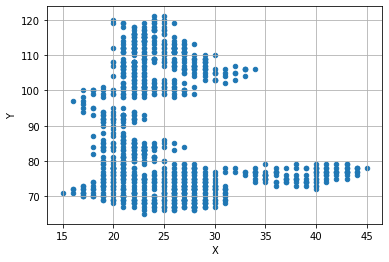

In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

the_list = [10,10,10,10,10,10,10,10]
def random_walk(list_rates,time_limit):
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = list_rates[0]  # up
    K_2 = list_rates[1]  # down
    K_3 = list_rates[2]  # right
    K_4 = list_rates[3] # left
    K_5 = list_rates[4] # right,top
    K_6 = list_rates[5]  # left,top
    K_7 = list_rates[6]  # right,bottom
    K_8 = list_rates[7]  # left,bottom
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    movements = [[0, 1], [0, -1], [1, 0], [-1, 0], [1, 1], [-1, 1], [1, -1], [-1, -1]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < time_limit:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    fig,ax = plt.subplots()
    plot_of_the_randomwalk = pandas_df.plot(kind='scatter',x='X', y='Y',s=None,ax=ax)
    ax.grid()
    plt.show()
random_walk(the_list,1000)

[95, 86]
       X      Y     time
0     95     86        0
1     95     87  0.43895
2     95     88   1.2468
3     95     89  2.72021
4     95     90  2.72055
...   ..    ...      ...
9972  95  10058  9998.18
9973  95  10059  9998.33
9974  95  10060  9999.69
9975  95  10061  9999.82
9976  95  10062  10000.1

[9977 rows x 3 columns]


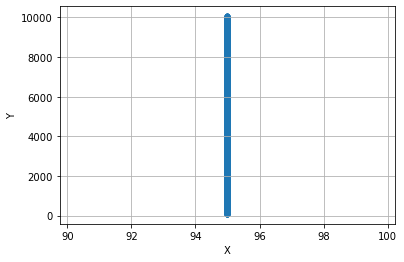

In [2]:
list_rates = [1,0,0,0,0,0,0,0]
random_walk(list_rates,10000)

[97, 72]
      X   Y      time
0    97  72         0
1    97  71  0.640408
2    98  71   4.21576
3    97  70   4.90697
4    98  69   6.37544
..   ..  ..       ...
471  93  49   496.493
472  94  48   496.912
473  95  49   497.417
474  94  50   498.071
475  95  51   500.129

[476 rows x 3 columns]


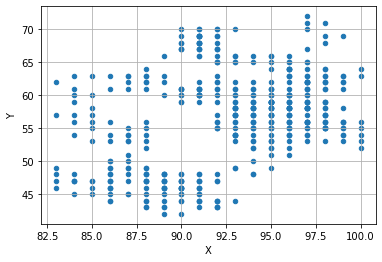

In [3]:
list_rates2 = [1,1,1,1,1,1,1,1]
random_walk(list_rates2,500)

##### Now, I also wanted to see if it were possible of instead of having to know in what order to import the rates it would be possible to import a dataframe with the rates being connected to movements. This change shouldn't play a role in the weights as it doesn't affect it. I haven't had the chance to try to this yet.

[60, 13]
       X   Y      time
0     60  13         0
1     59  14   0.21186
2     58  14  0.462215
3     57  15  0.574941
4     58  14   1.23689
...   ..  ..       ...
1033  27  49    997.68
1034  26  50   997.775
1035  25  49   997.998
1036  25  50   999.096
1037  26  49   1002.96

[1038 rows x 3 columns]


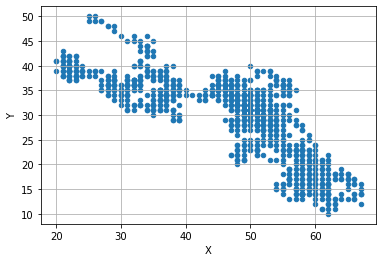

In [4]:
import numpy as np

import random
import math
import matplotlib.pyplot as plt
import pandas as pd
ax = np.array([(10,10,10,10,10,10,10,10),(0,0,1,-1,1,-1,1,-1),(1,-1,0,0,1,1,-1,-1)])
def random_walk(ax,time_limit):
    a = random.randint(1, 100)
    b = random.randint(1, 100)
    pandas_df = pd.DataFrame(columns=['X', 'Y', 'time'])
    print([a, b])
    K_1 = ax[0,0]  
    K_2 = ax[0,1]  
    K_3 = ax[0,2] 
    K_4 = ax[0,3] 
    K_5 = ax[0,4] 
    K_6 = ax[0,5] 
    K_7 = ax[0,6]  
    K_8 = ax[0,7] 
    K_tot = K_1 + K_2 + K_3 + K_4 + K_5 + K_6 + K_7 + K_8
    time = 0
    position = [a, b]
    movements = [[ax[1,0],ax[2,0]],[ax[1,1],ax[2,1]],[ax[1,2],ax[2,2]],[ax[1,3],ax[2,3]],
    [ax[1,4],ax[2,4]],[ax[1,5],ax[2,5]],[ax[1,6],ax[2,6]],[ax[1,7],ax[2,7]]]
    weights = [K_1 / K_tot, K_2 / K_tot, K_3 / K_tot, K_4 / K_tot, K_5 / K_tot, K_6 / K_tot, K_7 / K_tot, K_8 / K_tot]
    pandas_df.loc[0] = [a] + [b] + [0]
    line = 1
    while time < time_limit:
        step = random.choices(movements, weights)[0]
        random_var = 1 - random.random()
        time = time - math.log(random_var)
        for i in range(len(step)):
            position[i] += step[i]
        pandas_df.loc[line] = [position[0]] + [position[1]] + [time]
        line += 1
    print(pandas_df)
    fig,ax = plt.subplots()
    plot_of_the_randomwalk = pandas_df.plot(kind='scatter',x='X', y='Y',s=None,ax=ax)
    ax.grid()
    plt.show()
random_walk(ax,1000)

[62, 16]
         X   Y      time
0       62  16         0
1       63  16  0.614184
2       64  16     0.933
3       65  16   1.11345
4       66  16   4.13897
...    ...  ..       ...
1006  1068  16   994.757
1007  1069  16    996.71
1008  1070  16   999.109
1009  1071  16   999.975
1010  1072  16   1001.23

[1011 rows x 3 columns]


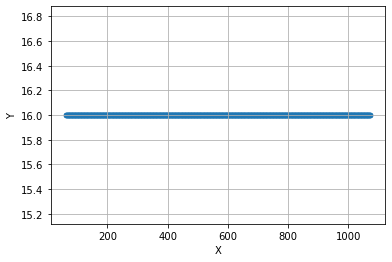

In [6]:
table =np.array([(0,0,1,0,0,0,0,0),(0,0,1,-1,1,-1,1,-1),(1,-1,0,0,1,1,-1,-1)])
random_walk(table,1000)

[44, 62]
      X    Y     time
0    44   62        0
1    44   63   3.1623
2    44   64  3.38706
3    44   65  4.37215
4    44   66  5.67145
..   ..  ...      ...
100  44  162  97.7128
101  44  163  98.2437
102  44  164  98.8588
103  44  165  99.5861
104  44  166  100.656

[105 rows x 3 columns]


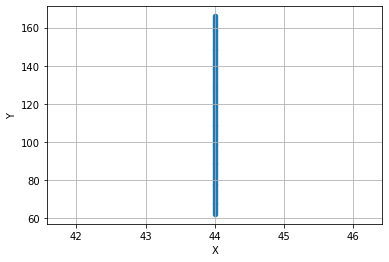

In [6]:
table =np.array([(100000,10,10,0,10,10,10,10),(0,0,1,-1,1,-1,1,-1),(1,-1,0,0,1,1,-1,-1)])
random_walk(table,100)

# Surface Generation


In order to create a 2D array of positions for the molecules of type "donor" and "acceptor", we must first find how many molecules of each we need. This is where I quickly ran into problems. For instance, we define the grid size to be 10 x 10, which would make an even amount of cells to be filled. If we have a ratio of 1:10 this would be problematic as we need 1 molecule of acceptor + 10 of donor, which is an odd amount (11* constant). This constant needs to be an integer for us to be able to multiply ( otherwise, we would be cutting molecules apart...). For example in a 10x10 cells there is no way to put entire molecules to achieve a 1:10 ratio.

Mathematically we have $n*n$ cells in total,hence we have $n^2 = Conc_{acc}* x +Conc_{don}*x$, where x is a constant. Hence we can factorise this to give $n^2=x(Conc_{acc}+Conc_{don})$ and it follows that we have $x=$$\frac{n^2}{(Conc_{acc}+Conc_{don})}$.

From this, we run into 2 possible scenarios. Either *x* is an integer or it's not an integer. If *x* is an integer, then we are multiplying integers with integers and everything works out fine. However, if *x* is not an integer it might still work out fine.

When we multiply the conc_acc by the constant x ,  have a situation analogous to $\frac{n^2}{a+b}$*a=$n^2*$$\frac{a}{a+b}$ 
where a= conc_acc and b=conc_don.

If we have that $\frac{a+b}{gcd(a,a+b)}$, *where gcd(a,a+b) is the highest common denominator of a and a+b*, and is a factor of $n^2$ (i.e. not co-prime)  then we can place the ratio a:b on the grid.
We obviously have that if  $n\vert a $ and $n\vert a+b$, then $n\vert b$. Here n is the highest common denominator of a and a+b
Proof: $a=n\cdot​ l$ & a+b=$n\cdot k$ then we have a+b-a=b , hence we can do b=(a+b)-(a)=$n \cdot k$-$n\cdot l$=$n\cdot (k-l)$
Thus, we don't need to check both.


In our situation, with the ratio 1:10 we have that $\frac{1+11}{gcd(1,11)}=\frac{11}{1}=11$ and as $n^2=10 000$,11 are co-prime (i.e. 11 doesn't divide 10 000) then this is impossible.


If we absolutely would like that the ratio is 1:10 then we could use a grid 99 x99 as 9801 can be divided by 11.

# Option 1: Generating a list of x, y coordinates associated with acceptors.
~~Well, the code below does that but not very useful? I don't see what would be the point of doing this.~~
Unless we do some kind of :
If x,y are in this dataframe, then return (essentially, it ends the simulation)

In [8]:
import random
import numpy as np
import pandas as pd
import copy
def surface_molecule_placements(n,ratio_conc_acc,conc_donors): # gridsize, here assuming the grid must be square, and ratio of acceptor vs donor
    conc_acc = float(ratio_conc_acc)
    conc_don = float(conc_donors)
    n_tot =n
    n_acc=(n_tot**2/(conc_acc+conc_don))*conc_acc  #Here we have found the number of acceptor molecules we must place on the surface
    print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors is",conc_acc,":",conc_don,"The number of sinks is",n_acc,".")
    list_of_positions = []
    for i in range(int(n_acc)):
        x_1=random.randint(1,n)
        y_1=random.randint(1,n)
        list = []
        for i in range(int(n_acc)):
            r= x_1,y_1
            if r not in list:
                list.append(r[:])
        print(list)
        
surface_molecule_placements(99,1,10) 

Size of grid is 99 x 99 ,The ratio of acceptors to donors is 1.0 : 10.0 The number of sinks is 891.0 .
[(20, 30)]
[(74, 9)]
[(75, 64)]
[(73, 20)]
[(26, 72)]
[(25, 44)]
[(93, 58)]
[(13, 9)]
[(54, 28)]
[(75, 40)]
[(15, 35)]
[(3, 85)]
[(91, 54)]
[(44, 83)]
[(96, 38)]
[(6, 8)]
[(69, 30)]
[(28, 53)]
[(24, 88)]
[(30, 71)]
[(26, 41)]
[(41, 80)]
[(82, 25)]
[(28, 24)]
[(47, 33)]
[(66, 86)]
[(89, 4)]
[(16, 93)]
[(14, 8)]
[(68, 31)]
[(87, 59)]
[(54, 21)]
[(73, 98)]
[(22, 90)]
[(10, 91)]
[(86, 55)]
[(83, 24)]
[(70, 48)]
[(42, 48)]
[(57, 54)]
[(34, 29)]
[(25, 54)]
[(67, 27)]
[(51, 31)]
[(26, 99)]
[(91, 54)]
[(97, 88)]
[(90, 72)]
[(36, 1)]
[(5, 57)]
[(63, 71)]
[(87, 53)]
[(41, 79)]
[(77, 76)]
[(99, 9)]
[(18, 56)]
[(25, 76)]
[(75, 83)]
[(36, 12)]
[(80, 52)]
[(6, 63)]
[(48, 88)]
[(16, 71)]
[(68, 63)]
[(6, 25)]
[(24, 57)]
[(77, 24)]
[(52, 23)]
[(86, 55)]
[(42, 97)]
[(37, 54)]
[(32, 41)]
[(27, 52)]
[(49, 93)]
[(54, 32)]
[(19, 49)]
[(33, 80)]
[(26, 94)]
[(83, 62)]
[(57, 95)]
[(70, 15)]
[(96, 71)]
[(32, 5

# Option 2: Generating a DataFrame with Pandas 
The code below generates a matrix that is the size of the grid, but is very inefficient the way I wrote it. The 3rd option would be the best.

In [9]:
import random
import numpy as np
import pandas as pd
import copy
import math
import time


def surface_create_random(n, ratio_acc, ratio_don):  # gridsize of a square, ratio of acceptors and ratio of donors
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    n_acc=n ** 2 /(ratio_acc + ratio_don) * ratio_acc
    nbr_acc = int(round(n ** 2 / (ratio_acc + ratio_don) * ratio_acc))
    if int(n_acc)==n_acc:
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors is", ratio_acc, ":",ratio_don,".",
          "The number of sinks is", n_acc,".")
    else:
        
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors has been adapted to fit the grid,the new ratio is:")
        b=n**2-nbr_acc
        a=nbr_acc
        comm_factor=math.gcd(a,b)
        
        print(int(nbr_acc/comm_factor),":",int(b/comm_factor))
        print("The number of sinks is",nbr_acc,".")
    

    
    i = 0
    while i<nbr_acc:
        x_rnd = random.randint(1, n)
        y_rnd = random.randint(1, n)

        if (pd.isnull(pnd_dataframe.loc[y_rnd, x_rnd])):
            pnd_dataframe.loc[y_rnd, x_rnd] = "Acceptor"
            i += 1

    for i in range(1, (n+1)):
        for j in range(1, (n+1)):
            if (pd.isnull(pnd_dataframe.loc[j, i])):
                pnd_dataframe.loc[j, i] = "Donor"

    print(pnd_dataframe)

    save_grid = str(input("Do you want to save this grid to a file?   (y/n)  : "))

    save_grid = save_grid.capitalize()
    print(save_grid)

    if save_grid[0] == 'Y':
        file_name =str(input("File name to be used:  (use the file extension nnnnn.csv)"))
        pnd_dataframe.to_csv(file_name, index=False)
surface_create_random(10,1,9)

Size of grid is 10 x 10 ,The ratio of acceptors to donors is 1 : 9 . The number of sinks is 10.0 .
          1         2         3         4      5      6         7      8   \
1      Donor     Donor  Acceptor     Donor  Donor  Donor     Donor  Donor   
2   Acceptor     Donor     Donor     Donor  Donor  Donor     Donor  Donor   
3      Donor     Donor     Donor     Donor  Donor  Donor     Donor  Donor   
4      Donor     Donor     Donor     Donor  Donor  Donor     Donor  Donor   
5   Acceptor     Donor     Donor     Donor  Donor  Donor     Donor  Donor   
6      Donor     Donor     Donor     Donor  Donor  Donor     Donor  Donor   
7      Donor  Acceptor     Donor     Donor  Donor  Donor  Acceptor  Donor   
8      Donor     Donor     Donor     Donor  Donor  Donor  Acceptor  Donor   
9   Acceptor     Donor     Donor     Donor  Donor  Donor     Donor  Donor   
10     Donor     Donor  Acceptor  Acceptor  Donor  Donor     Donor  Donor   

          9      10  
1      Donor  Donor  
2      Do

# Option 3: Using Numpy to generate the matrix/dataframe
The efficiency of the code above is actually low and running bigger sizes e.g. 1000x1000 would take a long time to compute.If we don't need the panda dataframe and would be okay with a numpy array (forms a matrix) this can be done more efficiently using numpy. The numpy array could be converted into a pd dataframe if needed. I do convert it here into a pd dataframe.


In [1]:
import random
import numpy as np
import pandas as pd
import copy
import math

def surface_create_random(n, ratio_acc, ratio_don):  # gridsize of a square, ratio of acceptors and ratio of donors
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    n_acc=n ** 2 /(ratio_acc + ratio_don) * ratio_acc
    nbr_acc = int(round(n ** 2 / (ratio_acc + ratio_don) * ratio_acc))
    if int(n_acc)==n_acc:
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors is", ratio_acc, ":",ratio_don,".",
          "The number of sinks is", n_acc,".")
    else:
        
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors has been adapted to fit the grid,the new ratio is:")
        b=n**2-nbr_acc
        a=nbr_acc
        comm_factor=math.gcd(a,b)
        
        print(int(nbr_acc/comm_factor),":",int(b/comm_factor))
        print("The number of sinks is",nbr_acc,".")
    
    n_acceptors=nbr_acc
    n_donors = n**2-nbr_acc
    rng = np.random.default_rng()
    m = rng.permutation(np.arange(n**2)).reshape((n,n))
    a_mask = m < n_acceptors
    d_mask = (n_acceptors <= m) & (m < n_donors + n_acceptors)
    output = np.full((n, n), "Typeofmol") 
    output[a_mask] = "Acceptor" 
    output[d_mask] = "Donor"
    Grid = output
    print(Grid)
    pnd_dataframe = pd.DataFrame.from_records(Grid)
    print(pnd_dataframe)

    save_grid = str(input("Do you want to save this grid to a file?   (y/n)  : "))

    save_grid = save_grid.capitalize()
    print(save_grid)

    if save_grid[0] == 'Y':
        file_name =str(input("File name to be used:  (use the file extension nnnnn.csv)"))
        pnd_dataframe.to_csv(file_name, index=False)
surface_create_random(10,1,9)


Size of grid is 10 x 10 ,The ratio of acceptors to donors is 1 : 9 . The number of sinks is 10.0 .
[['Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor']
 ['Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor']
 ['Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor']
 ['Donor' 'Donor' 'Donor' 'Acceptor' 'Acceptor' 'Donor' 'Donor' 'Donor'
  'Donor' 'Acceptor']
 ['Donor' 'Donor' 'Donor' 'Acceptor' 'Donor' 'Donor' 'Acceptor' 'Donor'
  'Donor' 'Donor']
 ['Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor']
 ['Donor' 'Acceptor' 'Donor' 'Donor' 'Acceptor' 'Donor' 'Acceptor'
  'Donor' 'Acceptor' 'Donor']
 ['Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor']
 ['Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor']
 ['Donor' 'Donor' 'Acceptor' 'Donor' 'Donor' 'Donor' 'Donor' 'Donor'
  'Donor' 'Donor']]
       0         1  

The code below to read a file is now useless, but I am keeping it anyways. It could be used to shorten the plotting code, if the function has been run before hand. However, if the Kernels are re-set then the code below relying on it would not work...

In [5]:
import pandas as pd
def surface_read_file():
    file_name = str(input("File name to be read:  (use the file extension nnnnn.csv)"))
    pnd_frm = pd.read_csv(file_name)
    pnd_frm.index += 1
    return pnd_frm
surface_read_file()

File name to be read:  (use the file extension nnnnn.csv)Toimiiko2.csv


,0,1,2,3,4,5,6,7,8,9
1,2,1,1,1,1,1,1,2,1,1
2,1,1,2,1,2,1,1,1,1,1
3,1,1,1,1,2,1,1,1,1,1
4,1,1,1,1,1,2,1,2,1,1
5,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,2
7,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,2,1,2
9,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1


Now, let's associate value's 1 with Donor and 2 with acceptor and then we can write the code to plot us our starting surface. As I'm only interested in plotting we can create a new function for this, however it could be useful having the plot generated as part of when the surface is created?

In [5]:
import random
import numpy as np
import pandas as pd
import copy
import math

def surface_create_random(n, ratio_acc, ratio_don):  # gridsize of a square, ratio of acceptors and ratio of donors
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    n_acc=n ** 2 /(ratio_acc + ratio_don) * ratio_acc
    nbr_acc = int(round(n ** 2 / (ratio_acc + ratio_don) * ratio_acc))
    if int(n_acc)==n_acc:
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors is", ratio_acc, ":",ratio_don,".",
          "The number of sinks is", n_acc,".")
    else:
        
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors has been adapted to fit the grid,the new ratio is:")
        b=n**2-nbr_acc
        a=nbr_acc
        comm_factor=math.gcd(a,b)
        
        print(int(nbr_acc/comm_factor),":",int(b/comm_factor))
        print("The number of sinks is",nbr_acc,".")
    

    n_acceptors=nbr_acc
    n_donors = n**2-nbr_acc
    rng = np.random.default_rng()
    m = rng.permutation(np.arange(n**2)).reshape((n,n))
    a_mask = m < n_acceptors
    d_mask = (n_acceptors <= m) & (m < n_donors + n_acceptors)
    output = np.full((n, n), 7) # the 7 is completely random, it is just placeholder where I needed a number
    output[a_mask] = 2 
    output[d_mask] = 1
    Grid = output
    print(Grid)
    pnd_dataframe = pd.DataFrame.from_records(Grid)
    print(pnd_dataframe)

    save_grid = str(input("Do you want to save this grid to a file?   (y/n)  : "))

    save_grid = save_grid.capitalize()
    print(save_grid)

    if save_grid[0] == 'Y':
        file_name =str(input("File name to be used:  (use the file extension nnnnn.csv)"))
        pnd_dataframe.to_csv(file_name, index=False)
surface_create_random(10,1,9)

Size of grid is 10 x 10 ,The ratio of acceptors to donors is 1 : 9 . The number of sinks is 10.0 .
[[2 1 1 1 1 1 1 2 1 1]
 [1 1 2 1 2 1 1 1 1 1]
 [1 1 1 1 2 1 1 1 1 1]
 [1 1 1 1 1 2 1 2 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2 1 2]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]
   0  1  2  3  4  5  6  7  8  9
0  2  1  1  1  1  1  1  2  1  1
1  1  1  2  1  2  1  1  1  1  1
2  1  1  1  1  2  1  1  1  1  1
3  1  1  1  1  1  2  1  2  1  1
4  1  1  1  1  1  1  1  1  1  1
5  1  1  1  1  1  1  1  1  1  2
6  1  1  1  1  1  1  1  1  1  1
7  1  1  1  1  1  1  1  2  1  2
8  1  1  1  1  1  1  1  1  1  1
9  1  1  1  1  1  1  1  1  1  1
Do you want to save this grid to a file?   (y/n)  : y
Y
File name to be used:  (use the file extension nnnnn.csv)Toimiiko2.csv


File name to be read:  (use the file extension nnnnn.csv)Test_ratio_kept.csv
[[1 1 2 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 2 1]
 [1 2 1 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2 1 1]
 [1 2 1 1 1 2 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 2 1 1 1 2]]


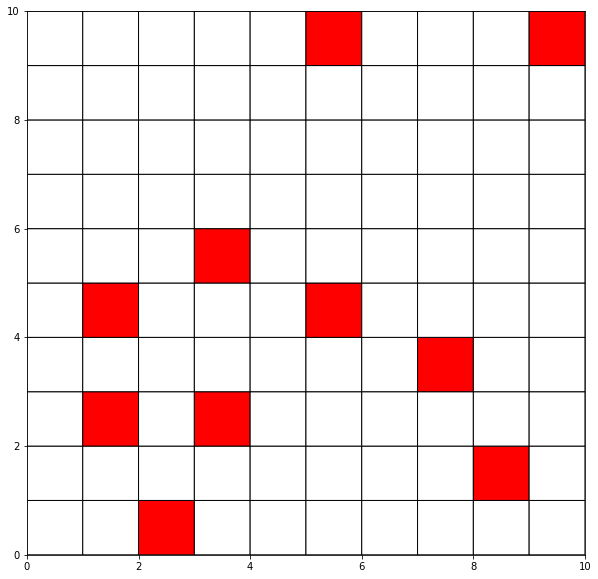

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib import colors
def surface_plot(k): # k affects figsize, k=1 is 1 cm maybe? k=5 5cm x 5cm etc.?
    file_name = str(input("File name to be read:  (use the file extension nnnnn.csv)"))
    pnd_frm = pd.read_csv(file_name)
    pnd_frm.index += 1
    surface_grid = pnd_frm.values
    print(surface_grid)
    data = surface_grid  
    cmap = colors.ListedColormap(['white','red'])
    plt.figure(figsize=(k,k))
    plt.pcolor(data[::1],cmap=cmap,edgecolors='k', linewidths=1)
    plt.show()
    
surface_plot(10)

Here I just combine plotting and surface creation to avoid having to save it to plot and manually call it

Size of grid is 101 x 101 ,The ratio of acceptors to donors is 1 : 100 . The number of sinks is 101.0 .
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


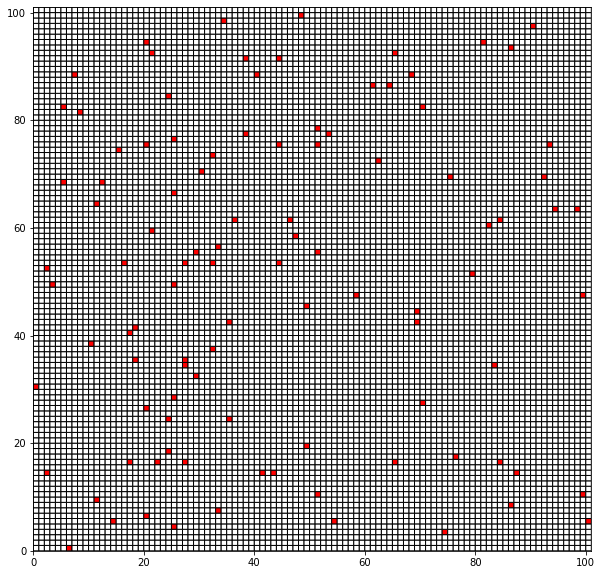

Do you want to save this grid to a file?   (y/n)  : n
N


In [3]:
import random
import numpy as np
import pandas as pd
import copy
import math
from matplotlib import pyplot as plt
from matplotlib import colors

def surface_create_random(n, ratio_acc, ratio_don):  # gridsize of a square, ratio of acceptors and ratio of donors
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    
    pnd_dataframe = pd.DataFrame(index=list(range(1, (n + 1))), columns=list(range(1, (n + 1))))
    n_acc=n ** 2 /(ratio_acc + ratio_don) * ratio_acc
    nbr_acc = int(round(n ** 2 / (ratio_acc + ratio_don) * ratio_acc))
    if int(n_acc)==n_acc:
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors is", ratio_acc, ":",ratio_don,".",
          "The number of sinks is", n_acc,".")
    else:
        
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors has been adapted to fit the grid,the new ratio is:")
        b=n**2-nbr_acc
        a=nbr_acc
        comm_factor=math.gcd(a,b)
        
        print(int(nbr_acc/comm_factor),":",int(b/comm_factor))
        print("The number of sinks is",nbr_acc,".")
    

    n_acceptors=nbr_acc
    n_donors = n**2-nbr_acc
    rng = np.random.default_rng()
    m = rng.permutation(np.arange(n**2)).reshape((n,n))
    a_mask = m < n_acceptors
    d_mask = (n_acceptors <= m) & (m < n_donors + n_acceptors)
    output = np.full((n, n), 7) 
    output[a_mask] = 2 
    output[d_mask] = 1
    Grid = output
    
    print(Grid)
    data = Grid  
    cmap = colors.ListedColormap(['white','red'])
    plt.figure(figsize=(10,10))
    plt.pcolor(data[::-1],cmap=cmap,edgecolors='k', linewidths=1)
    plt.show()
    
    save_grid = str(input("Do you want to save this grid to a file?   (y/n)  : "))

    save_grid = save_grid.capitalize()
    print(save_grid)
    pnd_dataframe = pd.DataFrame.from_records(Grid)
    if save_grid[0] == 'Y':
        file_name =str(input("File name to be used:  (use the file extension nnnnn.csv)"))
        pnd_dataframe = pd.DataFrame.from_records(Grid)
        pnd_dataframe.to_csv(file_name, index=False)
surface_create_random(101,1,100)

File name to be read:  (use the file extension nnnnn.csv)Test.csv
[[1 2 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1]
 [1 1 2 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 2 1 1 1 1 1 1 1 2]
 [1 1 2 1 1 1 2 2 1 1]
 [1 1 2 1 1 1 1 1 1 1]]


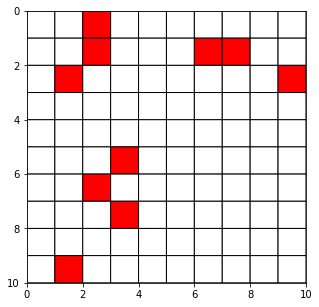

In [4]:
surface_plot(5)

Size of grid is 10 x 10 ,The ratio of acceptors to donors is 1 : 1 . The number of sinks is 50.0 .
[[1 2 1 1 2 2 2 1 2 2]
 [2 1 2 1 2 2 1 1 2 2]
 [1 2 1 1 2 1 2 1 1 1]
 [2 2 2 2 1 2 1 2 2 2]
 [1 1 1 2 1 2 1 1 1 2]
 [1 2 1 1 1 1 1 2 2 2]
 [1 1 1 1 1 2 1 2 1 2]
 [1 2 1 1 2 1 1 2 1 1]
 [2 1 2 1 1 2 2 1 2 2]
 [2 2 2 2 1 2 2 2 1 2]]


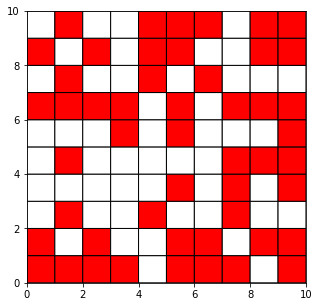

Do you want to save this grid to a file?   (y/n)  : n
N


In [24]:
surface_create_random(10,1,1)

# Problem: Gridsize and ratio
The code below asks if you want it to round the ratio or adjust gridsize

The ratio chosen is not compatible with the gridsize. Would you like to round the ratio or adjust the gridsize? Type 1 for round, type 2 to adjust gridsize1
Size of grid is 100 x 100 ,The ratio of acceptors to donors has been adapted to fit the grid,the new ratio is:
909 : 9091
The number of sinks is 909 .
[[1 1 1 ... 1 1 2]
 [1 1 1 ... 2 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 2 1 ... 1 1 1]
 [1 1 1 ... 1 1 2]
 [1 1 1 ... 1 1 1]]


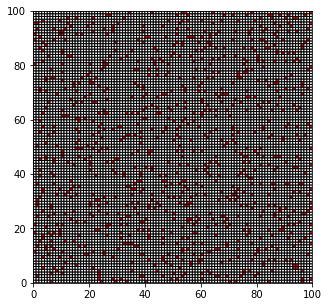

In [ ]:
import random
import numpy as np
import pandas as pd
import copy
import math
from matplotlib import pyplot as plt
from matplotlib import colors
from sympy import symbols, Eq, solve

def surface_creation(n,n_acc):
    n_acceptors= n_acc
    n_donors = n**2-n_acc
    rng = np.random.default_rng()
    m = rng.permutation(np.arange(n**2)).reshape((n,n))
    a_mask = m < n_acceptors
    d_mask = (n_acceptors <= m) & (m < n_donors + n_acceptors)
    output = np.full((n, n), 7) 
    output[a_mask] = 2 
    output[d_mask] = 1
    Grid = output
    print(Grid)
    data = Grid  
    cmap = colors.ListedColormap(['white','red'])
    plt.figure(figsize=(5,5))
    plt.pcolor(data[::-1],cmap=cmap,edgecolors='k', linewidths=1)
    plt.show()
    save_grid = str(input("Do you want to save this grid to a file?   (y/n)  : "))
    save_grid = save_grid.capitalize()
    print(save_grid)
    pnd_dataframe = pd.DataFrame.from_records(Grid)
    if save_grid[0] == 'Y':
        file_name =str(input("File name to be used:  (use the file extension nnnnn.csv)"))
        pnd_dataframe = pd.DataFrame.from_records(Grid)
        pnd_dataframe.to_csv(file_name, index=False)  

def surface_create_random(n, ratio_acc, ratio_don):  # gridsize of a square, ratio of acceptors and ratio of donors
  
    n_acc=n ** 2 /(ratio_acc + ratio_don) * ratio_acc
    if int(n_acc)==n_acc:
        print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors is", ratio_acc, ":",ratio_don,".",
          "The number of sinks is", n_acc,".")
        surface_creation(n,n_acc)

    else:
        answer= input("The ratio chosen is not compatible with the gridsize. Would you like to round the ratio or adjust the gridsize? Type 1 for round, type 2 to adjust gridsize")
        if answer =="1":
            nbr_acc = int(round(n ** 2 / (ratio_acc + ratio_don) * ratio_acc))
            print("Size of grid is", n, "x", n, ",The ratio of acceptors to donors has been adapted to fit the grid,the new ratio is:")
            b=n**2-nbr_acc
            a=nbr_acc
            comm_factor=math.gcd(a,b)
            print(int(nbr_acc/comm_factor),":",int(b/comm_factor))
            print("The number of sinks is",nbr_acc,".")
            surface_creation(n,nbr_acc)
            
        elif answer == "2":
            answer2= input("Please specify minimum size lenght (integer value)")
            comm_factor=math.gcd(int(ratio_acc),int(ratio_don))
            x = symbols('x')
            eq1 = (int(answer2)-x*(int(ratio_acc/comm_factor)+int((ratio_don)/comm_factor)))
            sol = solve(eq1)
            gridsize =math.ceil(sol[0])*(int(ratio_acc/comm_factor)+int((ratio_don)/comm_factor))
            n_acceptors=int(gridsize** 2) /(ratio_acc + ratio_don) * ratio_acc
            print("The new grid size has been adapted and is now", gridsize, "x", gridsize,"The number of sinks is", n_acceptors)  
            surface_creation(gridsize,n_acceptors)
            return
            
        else:
            print("You did not select an option. Please try again!")
            return   
surface_create_random(100,1,10)

Size of grid is 10 x 10 ,The ratio of acceptors to donors is 1 : 9 . The number of sinks is 10.0 .
[[1 1 1 1 1 2 1 1 1 1]
 [1 2 2 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2 1 1]
 [2 2 1 1 2 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 2 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 2]
 [1 1 1 1 1 1 1 1 1 1]]


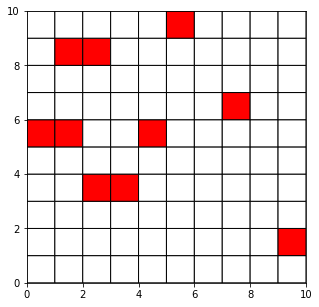

Do you want to save this grid to a file?   (y/n)  : n
N


In [8]:
surface_create_random(10,1,9)

File name to be read:  (use the file extension nnnnn.csv)Test_ratio_kept.csv
[[1 1 2 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 2 1]
 [1 2 1 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 2 1 1]
 [1 2 1 1 1 2 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 2 1 1 1 2]]


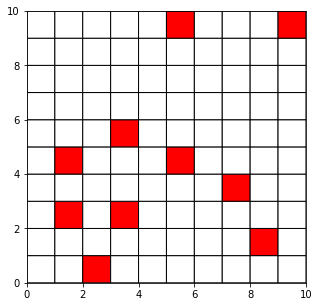

In [5]:
surface_plot(5)

The ratio chosen is not compatible with the gridsize. Would you like to round the ratio or adjust the gridsize? Type 1 for round, type 2 to adjust gridsize2
Please specify minimum size lenght (integer value)12
The new grid size has been adapted and is now 20 x 20 The number of sinks is 40.0
[[1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1]
 [1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1]
 [1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1]
 [1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1]
 [1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 2 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1]
 [1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1]
 [1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 1]
 [1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1]
 [1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1]
 [1 1 1 1 1 1 2 1 1 

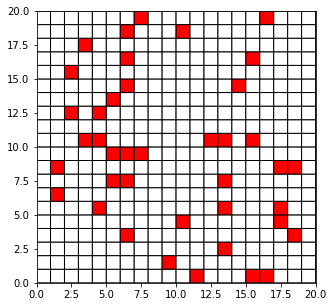

Do you want to save this grid to a file?   (y/n)  : n
N


In [13]:
surface_create_random(11,1,9)

### This section is purely comparing performance, you can skip this.
I claimed a difference in performance, but I haven't actually quantified it. I will now test the difference in performance by making both codes generate a 100 configurations of 100x100 grid's with the 1:9 ratio and time them both.